In [1]:
 import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:20<00:00, 21.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [2]:
# Importing nessasary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
 train_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [4]:
#Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [5]:
# Visualization
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    labels=category.split('/')[-1]
    for file in tqdm(glob(category+'/*')):
        try:
           img_array = cv2.imread(file)
           img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
           img_array = cv2.resize(img_array, (128, 128))
        except Exception as e:
           print(f"Error loading image {file}: {e}")
        x_data.append(img_array)
        y_data.append(labels)
data=pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:06<00:00, 1911.30it/s]


In [6]:
data.shape

(22564, 2)

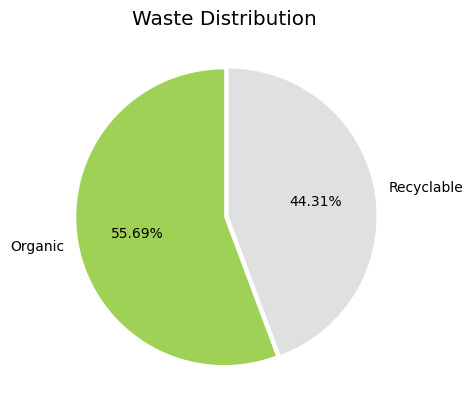

In [7]:
colors=['#a0d157','#1222']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'],autopct='%0.2f%%', colors= colors, startangle= 90, explode=[0.001, 0.03])
plt.rcParams.update({'font.size': 12})
plt.title("Waste Distribution")
plt.show()

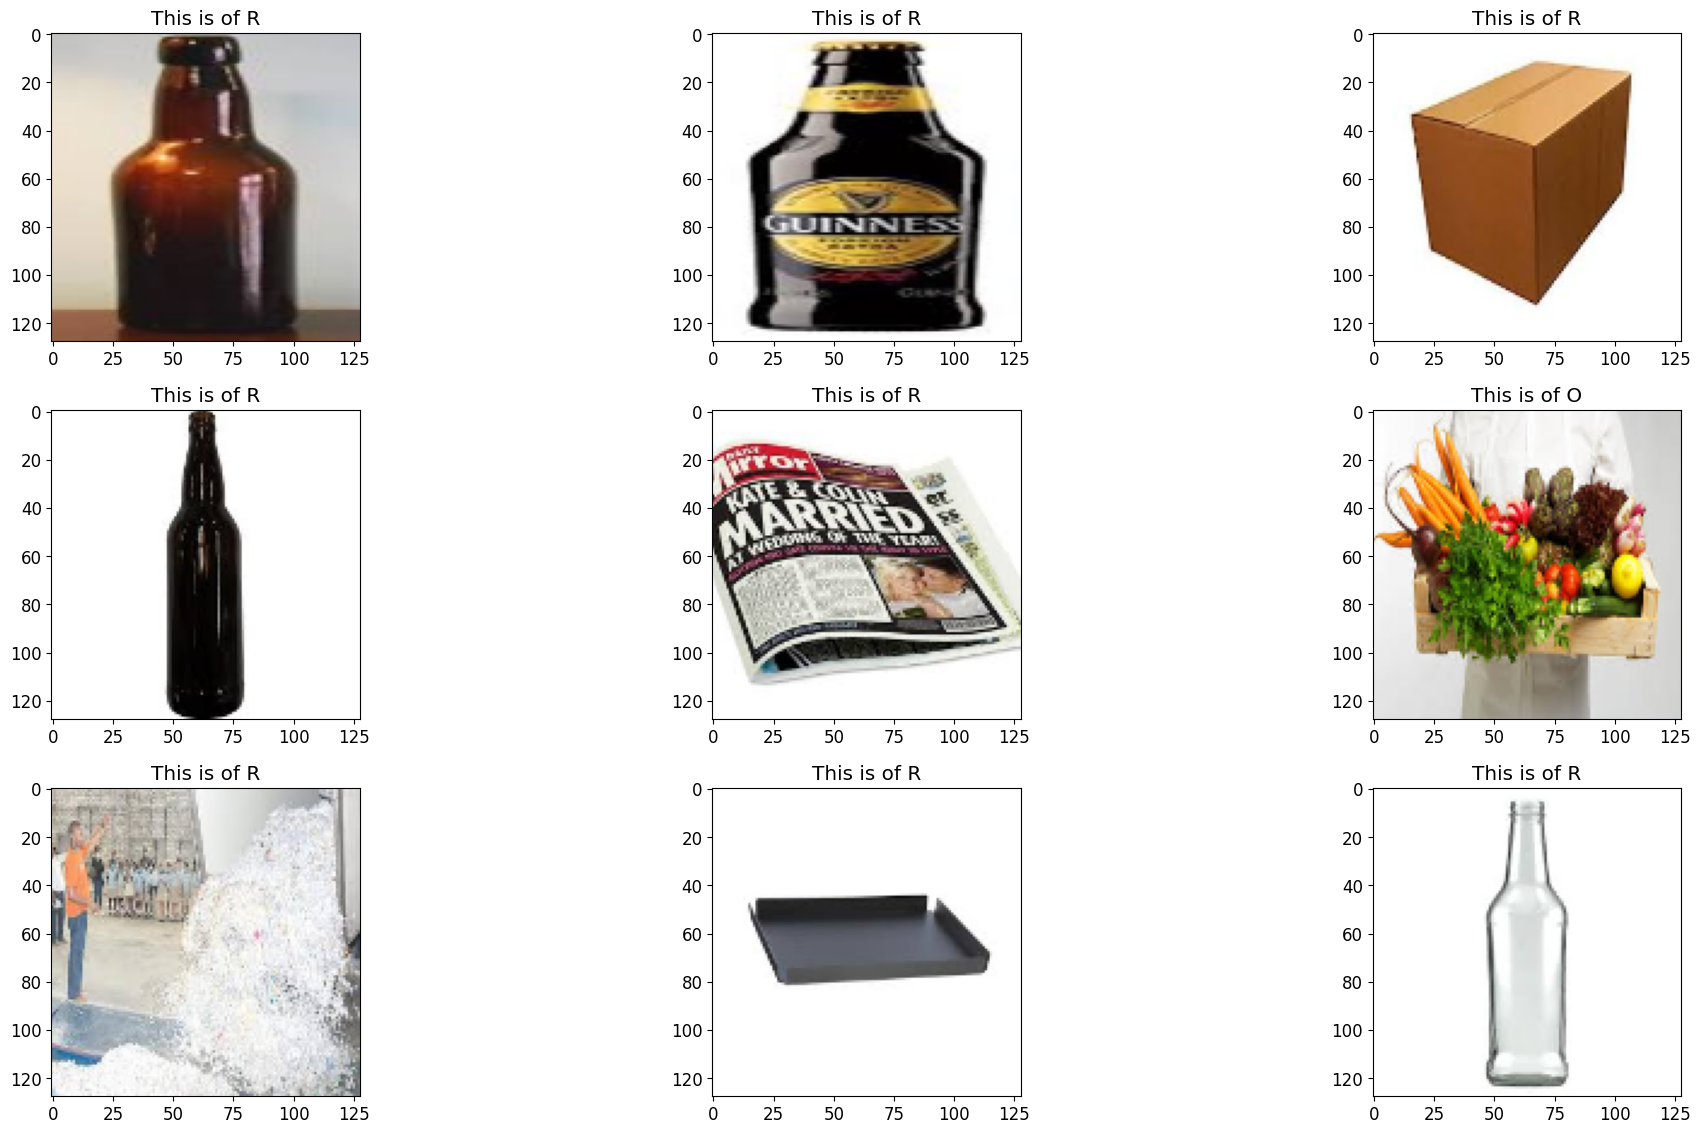

In [8]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [9]:
## CNN Convolutional Neural Network

In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [15]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 77s 186ms/step - accuracy: 0.7544 - loss: 0.5413 - val_accuracy: 0.8671 - val_loss: 0.3432
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 50s 143ms/step - accuracy: 0.8425 - loss: 0.3923 - val_accuracy: 0.8822 - val_loss: 0.2998
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 50s 142ms/step - accuracy: 0.8576 - loss: 0.3481 - val_accuracy: 0.8786 - val_loss: 0.2853
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 146ms/step - accuracy: 0.8705 - loss: 0.3291 - val_accuracy: 0.9021 - val_loss: 0.2520
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 53s 151ms/step - accuracy: 0.8873 - loss: 0.2807 - val_accuracy: 0.8826 - val_loss: 0.2986
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 54s 152ms/step - accuracy: 0.9052 - loss: 0.2493 - val_accuracy: 0.8934 - val_loss: 0.2879
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 65s 184ms/step - accuracy: 0.9238 - loss: 0.2046 - val_accuracy: 0.8854 - val_loss: 0.3155
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 70s 148ms/step - accuracy: 0.9417 - loss: 0

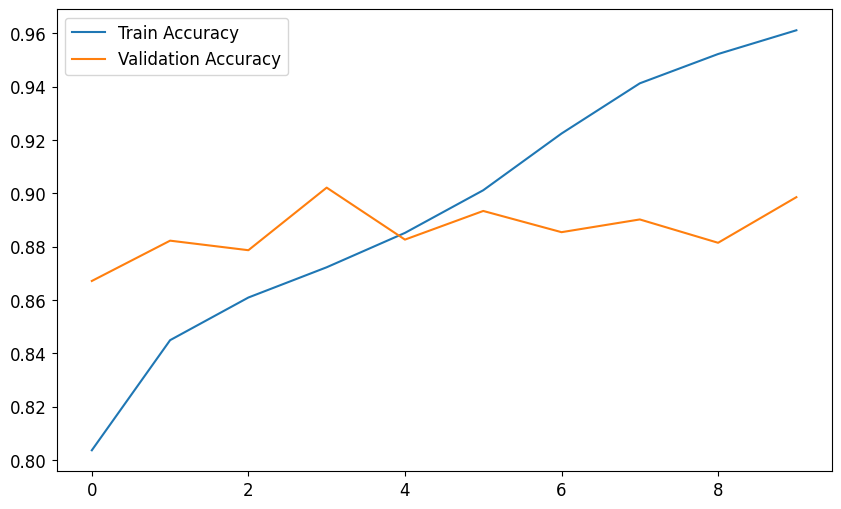

In [17]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],label='Train Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

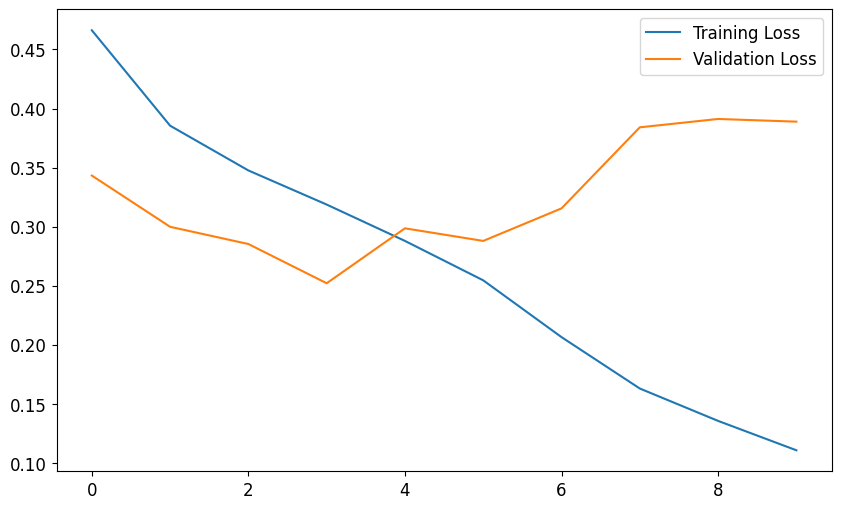

In [19]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [27]:
def predict_fun(img):
  plt.figure(figsize=(6,4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224,224))
  img = np.reshape(img, [-1,224,224,3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print("The image shown is Recyclable")
  elif result == 1:
    print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The image shown is Organic Waste


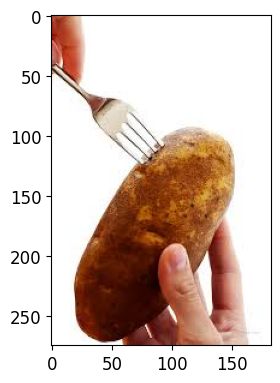

In [34]:
test_img = cv2.imread('/content/O_12878.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The image shown is Recyclable


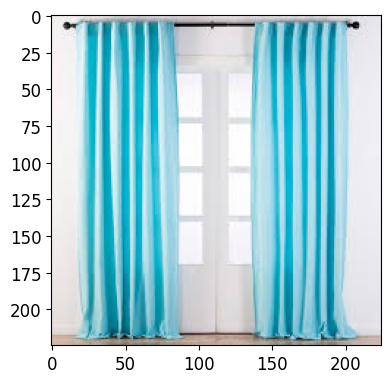

In [37]:
test_img = cv2.imread('/content/R_10091.jpg')
predict_fun(test_img)